In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\karth\OneDrive\Documents\Artificial Intelligence Course Materials\Self Exploration Projects\Alcohol Consumption Dataset\Alcohol Consumption Dataset.csv")

In [3]:
df.head()

,Rank,Country,Liters of pure alcohol consumed per capita
0,1,Belarus,17.5
1,2,Moldova,16.8
2,3,Lithuania,15.4
3,4,Russia,15.1
4,5,Romania,14.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Rank                                        25 non-null     int64  
 1   Country                                     25 non-null     object 
 2   Liters of pure alcohol consumed per capita  25 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 732.0+ bytes


In [5]:
df.describe()

,Rank,Liters of pure alcohol consumed per capita
count,25.000000,25.000000
mean,13.000000,13.160000
std,7.359801,1.575331
min,1.000000,11.600000
25%,7.000000,12.200000
50%,13.000000,12.500000
75%,19.000000,13.800000
max,25.000000,17.500000


In [6]:
df.isnull().sum()

Rank                                          0
Country                                       0
Liters of pure alcohol consumed per capita    0
dtype: int64

Top Consumers of Alcohol

   Rank    Country  Liters of pure alcohol consumed per capita
0     1    Belarus                                        17.5
1     2    Moldova                                        16.8
2     3  Lithuania                                        15.4
3     4     Russia                                        15.1
4     5    Romania                                        14.4


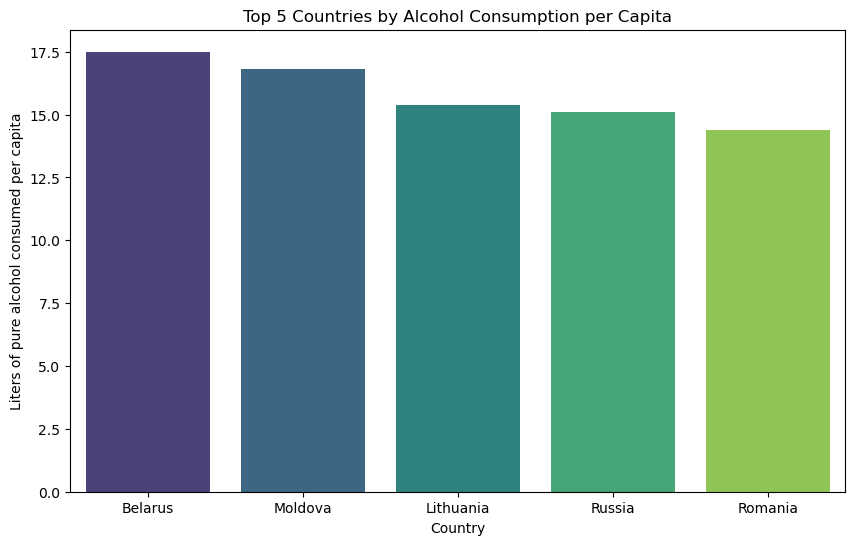

In [7]:
# Top 5 consumers of alcohol
top_5_consumers = df.head(5)
print(top_5_consumers)

# Plotting the top 5 consumers
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Liters of pure alcohol consumed per capita', data=top_5_consumers, palette='viridis')
plt.title('Top 5 Countries by Alcohol Consumption per Capita')
plt.xlabel('Country')
plt.ylabel('Liters of pure alcohol consumed per capita')
plt.show()

Distribution of Alcohol Consumption

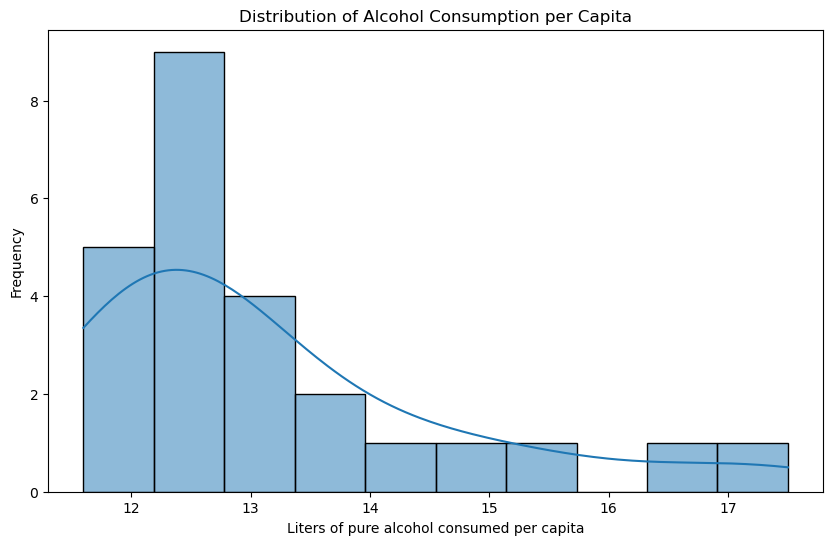

In [8]:
# Plotting the distribution of alcohol consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Liters of pure alcohol consumed per capita'], bins=10, kde=True)
plt.title('Distribution of Alcohol Consumption per Capita')
plt.xlabel('Liters of pure alcohol consumed per capita')
plt.ylabel('Frequency')
plt.show()

Average Alcohol Consumption

In [9]:
# Calculating the average alcohol consumption
average_consumption = df['Liters of pure alcohol consumed per capita'].mean()
print(f"The average alcohol consumption per capita is {average_consumption:.2f} liters.")

The average alcohol consumption per capita is 13.16 liters.


Country Comparison

In [10]:
# Top and bottom consumers
top_country = df.iloc[0]
bottom_country = df.iloc[-1]

print(f"Top Country: {top_country['Country']} with {top_country['Liters of pure alcohol consumed per capita']} liters.")
print(f"Bottom Country: {bottom_country['Country']} with {bottom_country['Liters of pure alcohol consumed per capita']} liters.")

Top Country: Belarus with 17.5 liters.
Bottom Country: United Kingdom with 11.6 liters.


Correlation Analysis

In [11]:
# Correlation between rank and alcohol consumption
correlation = df['Rank'].corr(df['Liters of pure alcohol consumed per capita'])
print(f"The correlation between rank and alcohol consumption is {correlation:.2f}.")

The correlation between rank and alcohol consumption is -0.88.


Standard Deviation

In [12]:
# Calculating the standard deviation
std_deviation = df['Liters of pure alcohol consumed per capita'].std()
print(f"The standard deviation of alcohol consumption per capita is {std_deviation:.2f} liters.")

The standard deviation of alcohol consumption per capita is 1.58 liters.


Median Alcohol Consumption

In [13]:
# Calculating the median alcohol consumption
median_consumption = df['Liters of pure alcohol consumed per capita'].median()
print(f"The median alcohol consumption per capita is {median_consumption:.2f} liters.")

The median alcohol consumption per capita is 12.50 liters.


Highest vs Lowest

In [14]:
# Difference between highest and lowest consumption
difference = top_country['Liters of pure alcohol consumed per capita'] - bottom_country['Liters of pure alcohol consumed per capita']
print(f"The difference in alcohol consumption between the highest and lowest ranked countries is {difference:.2f} liters.")

The difference in alcohol consumption between the highest and lowest ranked countries is 5.90 liters.


Quartile Analysis

In [15]:
# Calculating the first and third quartiles
first_quartile = df['Liters of pure alcohol consumed per capita'].quantile(0.25)
third_quartile = df['Liters of pure alcohol consumed per capita'].quantile(0.75)
print(f"The first quartile (Q1) is {first_quartile:.2f} liters.")
print(f"The third quartile (Q3) is {third_quartile:.2f} liters.")

The first quartile (Q1) is 12.20 liters.
The third quartile (Q3) is 13.80 liters.


Boxplot Visualization

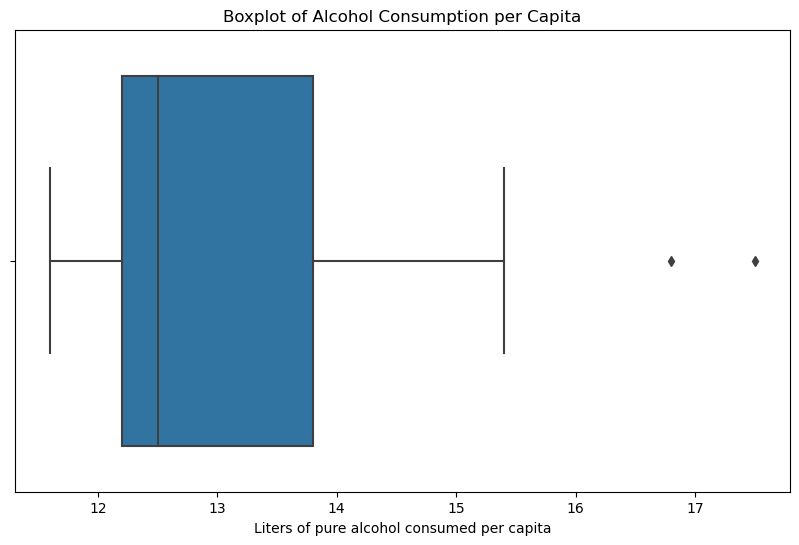

In [16]:
# Plotting a boxplot of alcohol consumption
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Liters of pure alcohol consumed per capita'])
plt.title('Boxplot of Alcohol Consumption per Capita')
plt.xlabel('Liters of pure alcohol consumed per capita')
plt.show()

Regional Analysis

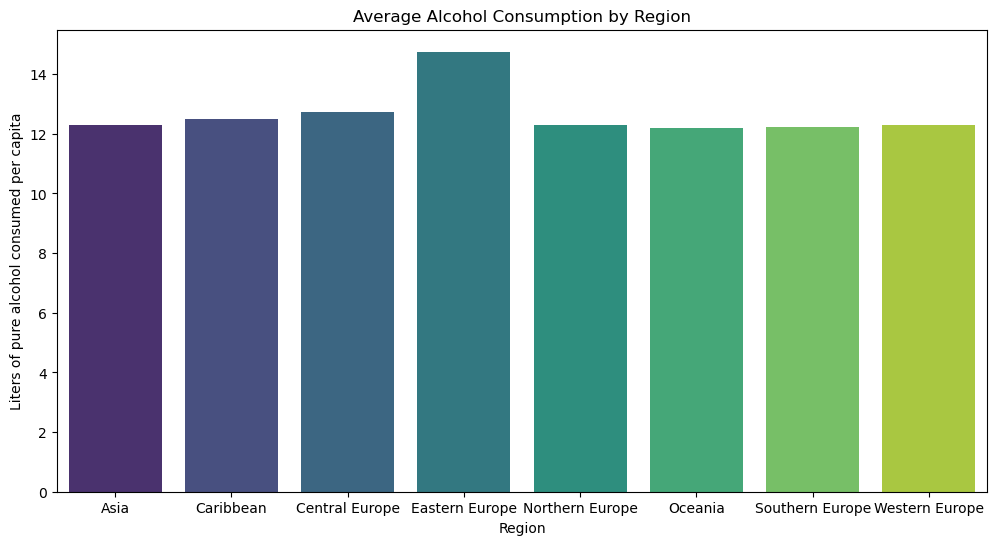

In [17]:
# Assuming you have regional classifications
region_data = {
    'Country': ['Belarus', 'Moldova', 'Lithuania', 'Russia', 'Romania', 'Ukraine', 'Andorra', 'Hungary', 'Czech Republic', 'Slovakia',
                'Portugal', 'Serbia', 'Grenada', 'Poland', 'Latvia', 'Finland', 'South Korea', 'France', 'Australia', 'Croatia',
                'Ireland', 'Luxembourg', 'Germany', 'Slovenia', 'United Kingdom'],
    'Region': ['Eastern Europe', 'Eastern Europe', 'Eastern Europe', 'Eastern Europe', 'Eastern Europe', 'Eastern Europe', 'Western Europe',
               'Central Europe', 'Central Europe', 'Central Europe', 'Southern Europe', 'Eastern Europe', 'Caribbean', 'Central Europe',
               'Eastern Europe', 'Northern Europe', 'Asia', 'Western Europe', 'Oceania', 'Southern Europe', 'Western Europe',
               'Western Europe', 'Central Europe', 'Southern Europe', 'Western Europe']
}

region_df = pd.DataFrame(region_data)

# Merging with the original dataset
merged_region_df = pd.merge(df, region_df, on='Country')

# Grouping by region and calculating the mean alcohol consumption
region_avg = merged_region_df.groupby('Region')['Liters of pure alcohol consumed per capita'].mean().reset_index()

# Plotting regional comparisons
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Liters of pure alcohol consumed per capita', data=region_avg, palette='viridis')
plt.title('Average Alcohol Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Liters of pure alcohol consumed per capita')
plt.show()

Clustering Analysis

C:\Users\karth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


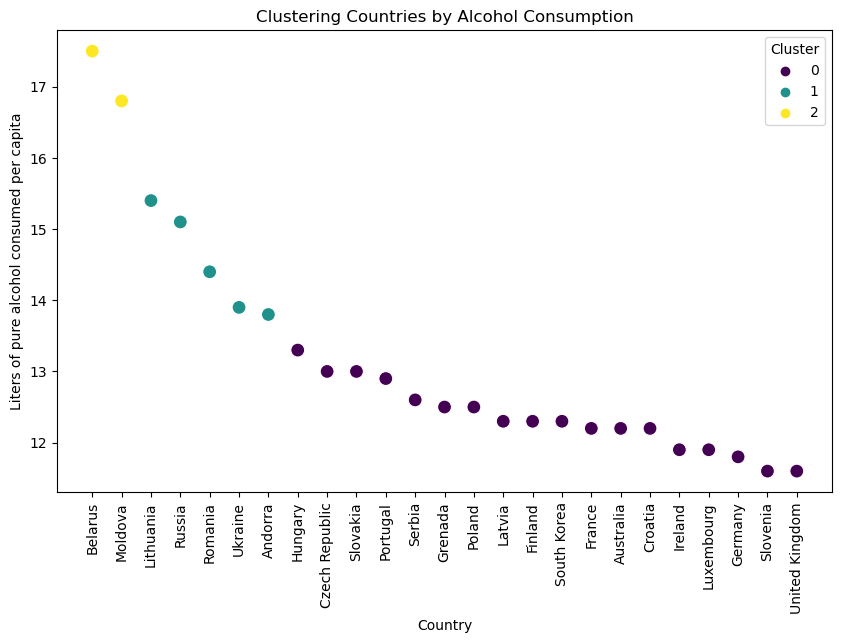

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Liters of pure alcohol consumed per capita']])

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country', y='Liters of pure alcohol consumed per capita', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clustering Countries by Alcohol Consumption')
plt.xlabel('Country')
plt.ylabel('Liters of pure alcohol consumed per capita')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()

Relationship with Other Social Factors

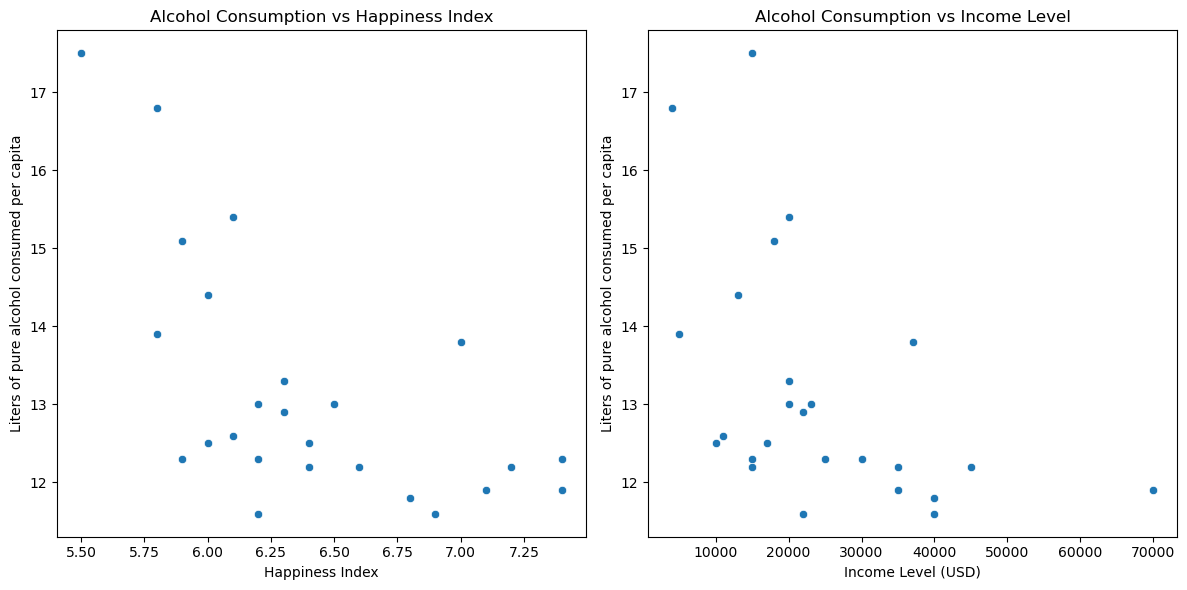

In [19]:
# Assuming you have additional social data
social_data = {
    'Country': ['Belarus', 'Moldova', 'Lithuania', 'Russia', 'Romania', 'Ukraine', 'Andorra', 'Hungary', 'Czech Republic', 'Slovakia',
                'Portugal', 'Serbia', 'Grenada', 'Poland', 'Latvia', 'Finland', 'South Korea', 'France', 'Australia', 'Croatia',
                'Ireland', 'Luxembourg', 'Germany', 'Slovenia', 'United Kingdom'],
    'Happiness_Index': [5.5, 5.8, 6.1, 5.9, 6.0, 5.8, 7.0, 6.3, 6.5, 6.2, 6.3, 6.1, 6.0, 6.4, 6.2, 7.4, 5.9, 6.6, 7.2, 6.4, 7.1, 7.4, 6.8, 6.2, 6.9],  # Example happiness index
    'Income_Level': [15000, 4000, 20000, 18000, 13000, 5000, 37000, 20000, 23000, 20000, 22000, 11000, 10000, 17000, 15000, 25000, 30000, 35000, 45000, 15000, 35000, 70000, 40000, 22000, 40000]  # Example income per capita in USD
}

social_df = pd.DataFrame(social_data)

# Merging with the original dataset
merged_social_df = pd.merge(df, social_df, on='Country')

# Plotting the relationship between alcohol consumption and happiness index
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Happiness_Index', y='Liters of pure alcohol consumed per capita', data=merged_social_df)
plt.title('Alcohol Consumption vs Happiness Index')
plt.xlabel('Happiness Index')
plt.ylabel('Liters of pure alcohol consumed per capita')

# Plotting the relationship between alcohol consumption and income level
plt.subplot(1, 2, 2)
sns.scatterplot(x='Income_Level', y='Liters of pure alcohol consumed per capita', data=merged_social_df)
plt.title('Alcohol Consumption vs Income Level')
plt.xlabel('Income Level (USD)')
plt.ylabel('Liters of pure alcohol consumed per capita')

plt.tight_layout()
plt.show()